In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv('/content/breast-cancer.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# implement KNN

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    acc = knn.score(x_test, y_test)
    accuracies.append(acc)

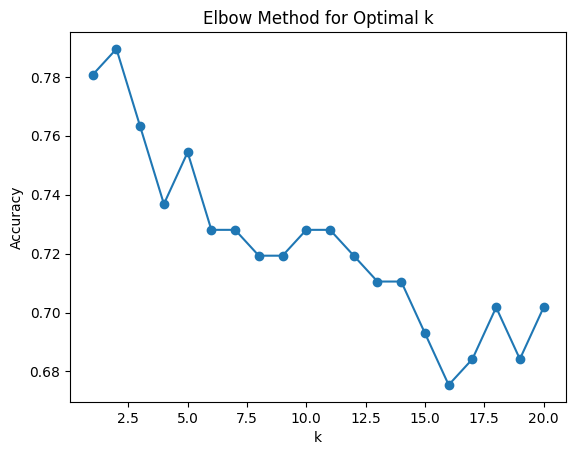

In [16]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
knn.fit(x_train,y_train)
Y_prd_knn=knn.predict(x_test)
cm=confusion_matrix(y_test,Y_prd_knn)
cm

array([[68,  3],
       [31, 12]])

In [19]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, Y_prd_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.96      0.80        71
           1       0.80      0.28      0.41        43

    accuracy                           0.70       114
   macro avg       0.74      0.62      0.61       114
weighted avg       0.73      0.70      0.65       114



In [21]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=2)
scores_knn = cross_val_score(knn, x_train, y_train, cv=10,scoring="accuracy")
print(scores_knn.mean())

0.7535748792270531
